# SD TSIA204 Computer lab 2
*Adrien Boitreaud*

In [404]:
fn1 = "adrien"
ln1 = "boitreaud"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

### Import section

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats

from sklearn import preprocessing
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn')

## Data preprocessing

In [406]:
# Set random seed to 0
random.seed(0)

In [407]:
# Import data file
df = pd.read_csv("data_dm3.csv")
dfarray = np.array(df)

In [408]:
n,p = np.shape(dfarray)

In [409]:
# Compute the mean, the variance and the max of each column
means = df.mean(axis=0)
var = df.var(axis=0)
maxs = df.max(axis=0)

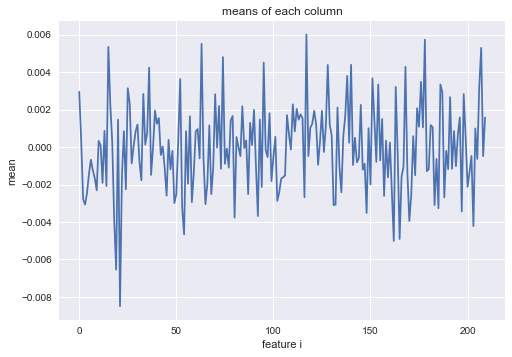

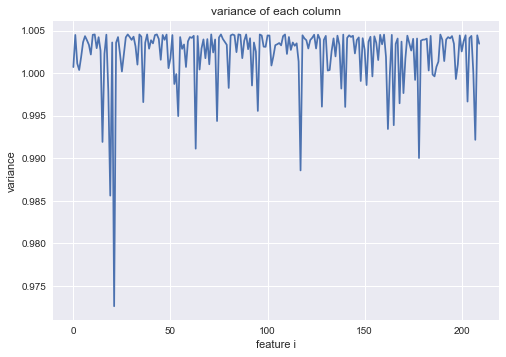

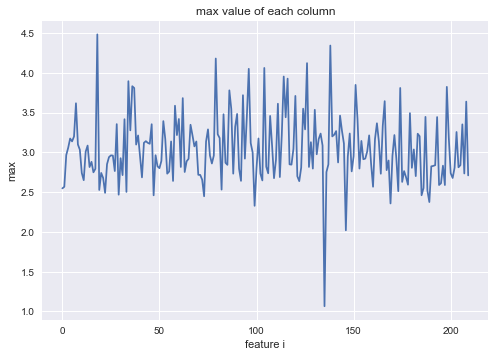

In [410]:
# Plot the resuls
plt.plot(np.array(means[:-1]))
plt.xlabel('feature i')
plt.ylabel('mean')
plt.title('means of each column')
plt.show()
plt.plot(np.array(var[:-1]))
plt.xlabel('feature i')
plt.ylabel('variance')
plt.title('variance of each column')
plt.show()
plt.plot(np.array(maxs[:-1]))
plt.xlabel('feature i')
plt.ylabel('max')
plt.title('max value of each column')
plt.show()

The data looks to be centered and standardized. However, since we find max value for each column greater than 1, it does not seem to be normalized.

In [411]:
# Split the dataset into two matrixes
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [412]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=0)

In [413]:
y_test = np.array(y_test).reshape(111,1)
y_train = np.array(y_train).reshape(330,1)

In [414]:
# Center and standardize the data
scaler = preprocessing.StandardScaler()
X_trainc = scaler.fit_transform(X_train)
X_testc = scaler.transform(X_test)

In [415]:
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

y_train = y_train.reshape(330,)
y_test = y_test.reshape(111,)

We center and standardize the data with the mean and variance of the training set and apply the transformation to the test set. This is how we would do if we had to predict y at a new sample: center it and scale it according to the parameters of the train set.

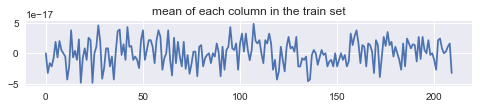

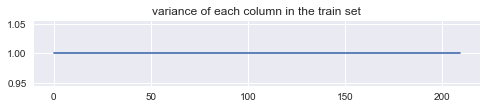

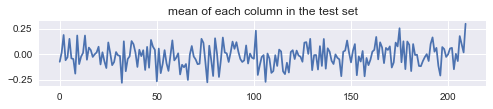

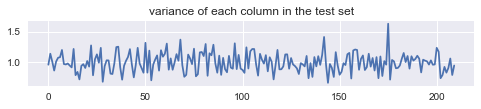

In [416]:
plt.subplot(411)
plt.plot(np.mean(X_trainc, axis=0))
plt.title('mean of each column in the train set')
plt.show()
plt.subplot(412)
plt.plot(np.var(X_trainc, axis=0))
plt.title('variance of each column in the train set')
plt.show()
plt.subplot(413)
plt.plot(np.mean(X_testc, axis=0))
plt.title('mean of each column in the test set')
plt.show()
plt.subplot(414)
plt.plot(np.var(X_testc, axis=0))
plt.title('variance of each column in the test set')
plt.show()

As expected, the data is perfectly centered and standardized for the training set.\
For the test set, the data is not exactly centered and standardized since we have used the parameters of the training set.

In [417]:
# Create the two enply dataframes
df_test = pd.DataFrame()
df_coef = pd.DataFrame()
# We add a third dataframe that will be useful for question 14
df_score = pd.DataFrame()

### Question 2
Let's write a function that computes the determination coefficient and one for the mean squarred error

In [469]:
def determination_coef(y,y_pred):
    """
    Function to compute the determination coefficient of a model
    args:
    y is the observation, the value to be predicted
    y_pred is the predicted value
    """
    res = np.sum((y-y_pred)**2) # sum of squarred residuals
    tmp = np.sum((y- np.mean(y))**2) # sum of y centered
    return 1 - res/tmp

In [470]:
def mse(y,y_pred):
    """
    Function to compute the mean square error of a model
    args:
    y is the observation, the value to be predicted
    y_pred is the predicted value
    """
    return np.mean((y - y_pred)**2)

### Question 3

In [420]:
# Baseline with sklearn.LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_trainc, y_train)
y_pred = linear_reg.predict(X_testc)

In [421]:
print('The determination coef of our baseline is',
      determination_coef(y_test, np.array(y_pred))
     )

The determination coef of our baseline is 0.36458962953766005


In [422]:
print('We check that r² is the same as the one from sklearn:',
      linear_reg.score(X_testc, y_test)
     )

We check that r² is the same as the one from sklearn: 0.36458962953766005


In [423]:
print('The computed MSE for OLS is : mse =', mse(y_test, y_pred))

The computed MSE for OLS is : mse = 0.6330841802902993


In [424]:
# Add a column with the predicted values and the regression coefficients 
# to our two empty datasets
df_test['OLS'] = y_pred.reshape(111)
df_coef['OLS'] = linear_reg.coef_.reshape(210,)
df_score['OLS'] = (determination_coef(y_test, np.array(y_pred)), 
                   mse(y_test, y_pred))

### Question 4

In [425]:
# Compute the covariance matrix.
# It should be equal to X_trainc.T @ X_trainc/(n-1)
cov_matrix = np.cov(X_trainc.T)

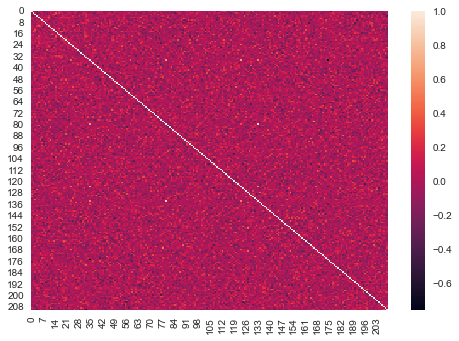

In [426]:
sns.heatmap(cov_matrix)
plt.show()

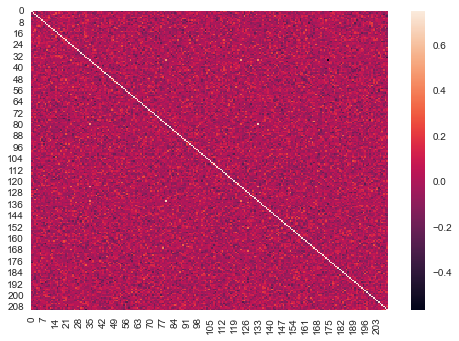

In [428]:
# Let's compare it with the heatmap of X_trainc.T @ X_trainc/(n-1)
sns.heatmap(X_trainc.T @ X_trainc/(n-1))
plt.show()

In [429]:
U,s,V = np.linalg.svd(1/(n-1)*X_trainc.T @ X_trainc)

### Question 5

We've computed the singular values of the covariance matrix multiplied by a factor $(n-1)$\
They are in the vector $s$.\
We compute the singular values of $X$  in the vector sx and check that \
$\forall i \in \{1, ..., n\}, s_i - sx_i^2$ is close to zero

In [432]:
Ux, sx, Vx = np.linalg.svd(X_trainc)

In [433]:
print('The norm of the vector of differences between the two values is :',
      np.linalg.norm(s -sx**2/(n-1))
     )

The norm of the vector of differences between the two values is : 2.3585680782289147e-14


We give a theoretical proof.

$X^tX$ is semi-definite positive because $\forall u, u^tX^tXu = \lVert Xu \rVert \ge 0$

Let's denote $X = UDV^t$, and $\sigma_i$ the eigenvalues of $X$.

We also know that $X^tX$ is symmetric which gives that $U = V^t$

Then, $(n-1)^{-1} X^tX = (n-1)^{-1} V^tD^tU^tUDV$

But, we know that $U$ is an orthogonal matrix. Therefore, $U^tU = I_d$

And $D$ is diagonal so $D^tD = D^2$

This gives us $(n-1)^{-1} X^tX = V^t((n-1)^{-1}D^2)V$

This is the singular value decomposition of $X^tX$, where the singular values are equal to the eigenvalues because $X^tX$ is square. We only have one matrix $V$ instead of $U$ and $V$ because $X^tX$ is semi definite positive.

We get that the eigen values of $X^tX$, the $\lambda_i$ are equal to $(n-1)^{-1} \sigma_i$, where $\sigma_i$ are the singular values of $X$.\
The descending order remains unchanged because we multiply two diagonal matrices.

### Question 6

In [434]:
print('Variance along the first principal component :',
      np.linalg.norm(X_trainc@U[:,0])
     )

print('Variance along the second principal component :',
      np.linalg.norm(X_trainc@U[:,1])
     )

Variance along the first principal component : 43.08256615411942
Variance along the second principal component : 42.08737659455794


In [435]:
Z = X_trainc@U[:, :2] ## Z is the projected data

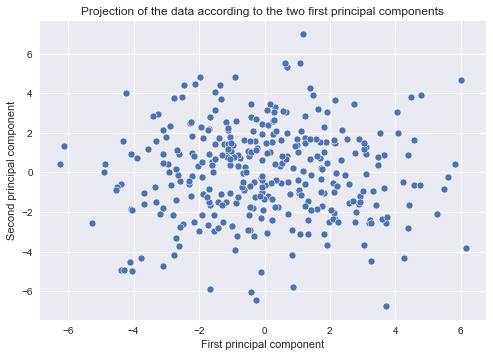

In [436]:
sns.scatterplot(x=Z[:,0], y=Z[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection of the data according to the two first principal components')
plt.show()

### Question 7

In [437]:
loadings = [U[i]*np.sqrt(s[i]) for i in [0,1]]

In [438]:
origin = np.array([[0 for i in range(len(loadings[0]))],
                   [0 for i in range(len(loadings[0]))]]
                 ) # origin point

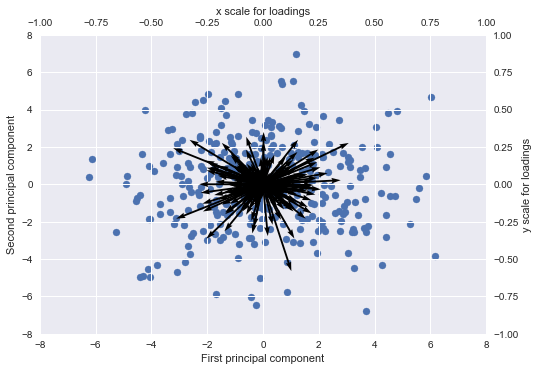

In [439]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.scatter(x=Z[:,0], y=Z[:,1])
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

ax2.quiver(*origin, loadings[0], loadings[1], color=['black'],
           angles='xy', scale_units='xy', scale=1
          )
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_xlabel('x scale for loadings') 
ax2.set_ylabel('y scale for loadings')       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 

In terms of variance, the loadings show which component explains the most variance in the corresponding directions for the two new components. If we had a stricly vertical arrow, it would mean that this components was 100% explained by the second principal component.

### Question 8

PCA before OLS :

In [440]:
Z_train = X_trainc@U[:, :60] # projected data for train set
Z_test = X_testc@U[:, :60] # projected data for test set

linear_reg.fit(Z_train, y_train)
y_pred = linear_reg.predict(Z_test)

In [441]:
print('The computed MSE for OLS is : mse =', mse(y_test, y_pred))
print('The determination coef of PCA before OLS is:',
      determination_coef(y_test, np.array(y_pred))
     )

The computed MSE for OLS is : mse = 0.5835323492515583
The determination coef of PCA before OLS is: 0.4143235327019691


In [442]:
print('We check that r² is the same as the one from sklearn:',
      linear_reg.score(Z_test, y_test)
     )

We check that r² is the same as the one from sklearn: 0.4143235327019691


In [443]:
df_test['pca_ols'] = y_pred
df_score['pca_ols'] = (determination_coef(y_test, np.array(y_pred)),
                       mse(y_test, y_pred))

## Regularization
### Question 9
Lasso model

In [444]:
alpha_scale = np.logspace(-3, 1, 30)
reg = LassoCV(random_state=0,alphas=alpha_scale).fit(X_trainc, y_train)

In [445]:
y_pred_LASSO = reg.predict(X_testc)

In [451]:
print('The computed MSE for Lasso is : mse =', mse(y_test, y_pred_LASSO))
print('The determination coef for Lasso is:',
      determination_coef(y_test, np.array(y_pred_LASSO))
     )

The computed MSE for Lasso is : mse = 0.4815844799719935
The determination coef for Lasso is: 0.516645996923189


In [452]:
print('The regularization parameter for Lasso is:', reg.alpha_)

The regularization parameter for Lasso is: 0.08531678524172806


In [453]:
df_test['lasso'] = y_pred_LASSO
df_coef['lasso'] = reg.coef_
df_score['lasso'] = (determination_coef(y_test, np.array(y_pred_LASSO)),
                     mse(y_test, y_pred_LASSO))

### Question 10

In [449]:
# Ridge regularization
clf = RidgeCV(alphas=np.logspace(-1, 2, 30)).fit(X_trainc, y_train)
y_pred_Ridge = clf.predict(X_testc)

In [455]:
print('The computed MSE for Ridge is : mse =', mse(y_test, y_pred_Ridge))
print('The determination coef for Ridge regularization is:',
      determination_coef(y_test, np.array(y_pred_Ridge)))

The computed MSE for Ridge is : mse = 0.5674213991613288
The determination coef for Ridge regularization is: 0.4304936805022803


In [456]:
print('The regularization parameter is:', clf.alpha_)

The regularization parameter is: 62.10169418915616


In [457]:
df_test['Ridge'] = y_pred_Ridge
df_coef['Ridge'] = clf.coef_
df_score['Ridge'] = (determination_coef(y_test, np.array(y_pred_Ridge)),
                     mse(y_test, y_pred_Ridge))

The ridge estimator performs slightly worse than the Lasso on our data but both are performing similarlys and better compared to OLS, our baseline.
## Variable selection

### Question 11

In [465]:
def forward_variable_selection(X,y):
    """
    Computes the forward variable selection algorithm on dataset X with target y
    Returns the ordered list of selected variables
    """
    n,p = np.shape(X)
    linear_reg = LinearRegression()
    S = [] # list of selected variables
    A = [i for i in range(p)]
    r = y
    while len(A) > 0: # run until all variables are used
        tests = {}
        thetas = {}
        for k in A:
            k_th_column = np.stack((np.ones(n), X[:,k]), axis=1)
            # two columns matrix, one of 1s, and the kth column of X
            linear_reg.fit(k_th_column, r)
            theta_hat = linear_reg.coef_
            Gram = k_th_column.T @ k_th_column/n
            sigma_hat = np.linalg.norm(r - k_th_column @ theta_hat)**2 / (n-2)
            s_hat = np.sqrt(np.linalg.inv(Gram)[0][0])
            T_hat = (np.sqrt(n)
                    * np.abs(theta_hat[1])
                    / (s_hat * sigma_hat))
            
            
            thetas[k] = theta_hat # put the theta for this variable in the dict
            tests[k] = T_hat # put the value of the test in the dict
            
        # find the variable that has the highest statistical test value
        k_star = max(tests, key=tests.get)
        S.append(k_star) 
        A.remove(k_star)
        r = r - np.stack((np.ones(n), X[:,k_star]), axis=1) @ thetas[k_star]
    return S

In [466]:
print('The order of the variables is:\n',
      forward_variable_selection(X_trainc, y_train)
     )

The order of the variables is:
 [58, 123, 167, 133, 130, 31, 5, 13, 45, 24, 135, 34, 40, 47, 85, 43, 19, 94, 132, 180, 112, 200, 209, 33, 153, 56, 208, 183, 143, 36, 8, 86, 99, 204, 48, 26, 59, 137, 168, 181, 27, 138, 174, 79, 202, 23, 95, 150, 115, 148, 89, 161, 57, 77, 131, 0, 179, 67, 163, 11, 175, 191, 113, 184, 55, 97, 126, 71, 63, 39, 14, 84, 164, 88, 9, 12, 134, 114, 203, 64, 68, 75, 189, 110, 81, 50, 52, 129, 60, 2, 7, 74, 193, 122, 28, 205, 25, 139, 190, 106, 20, 87, 91, 15, 76, 66, 17, 177, 96, 118, 173, 162, 29, 72, 46, 169, 18, 186, 155, 70, 80, 51, 127, 83, 62, 44, 171, 201, 156, 187, 37, 111, 188, 144, 42, 194, 141, 207, 120, 128, 53, 206, 158, 32, 107, 92, 101, 65, 35, 100, 119, 145, 196, 146, 142, 136, 82, 1, 147, 6, 30, 199, 3, 125, 195, 197, 176, 22, 105, 38, 170, 185, 73, 166, 140, 159, 160, 90, 108, 4, 172, 178, 93, 78, 149, 54, 117, 49, 69, 182, 104, 192, 121, 16, 41, 61, 151, 165, 21, 102, 157, 152, 154, 103, 124, 109, 198, 116, 98, 10]


### Question 12
Forward variables selection with stopping criterion. We only select variables with a p-value smaller than 0.05

In [468]:
def stopping_forward_variable_selection(X, y, p_stop=0.05):
    """
    Computes the forward variable selection algorithm on dataset X with target y
    Only selects variables for which the smallest p-value is larger than p_stops
    Returns the ordered list of selected variables
    """
    n,p = np.shape(X)
    linear_reg = LinearRegression()
    S = [] # list of selected variables
    A = [i for i in range(p)]
    r = y
    stop = False
    while not stop: # Stop if no p-values are smaller than p_stop
        tests = {}
        thetas = {}
        
        for k in A:
            k_th_column = np.stack((np.ones(n), X[:,k]), axis=1)
            # two columns matrix, one of 1s, and the kth column of X
            linear_reg.fit(k_th_column, r)
            theta_hat = linear_reg.coef_
            Gram = k_th_column.T @ k_th_column/n
            sigma_hat = np.linalg.norm(r - k_th_column @ theta_hat)**2 / (n-2)
            s_hat = np.sqrt(np.linalg.inv(Gram)[0][0])
            T_hat = (np.sqrt(n)
                    * np.abs(theta_hat[1]) 
                    / (s_hat * sigma_hat))
            
            thetas[k] = theta_hat # put the theta for this variable in the dict
            tests[k] = T_hat # put the value of the test in the dict

        # find the variable that has the highest statistical test value
        k_star = max(tests, key=tests.get)
        S.append(k_star)
        A.remove(k_star)
        r = r - np.stack((np.ones(n), X[:,k_star]), axis=1) @ thetas[k_star]
        
        p_value = min(2 * (1 - scipy.stats.norm.cdf(list(tests.values()))))
        if p_value > p_stop:
            stop = True
    # we must remove the last variable because it caused to stop so  
    # all its p_values are higher than p_stop
    S.pop()
    return S

In [461]:
selected_variables = stopping_forward_variable_selection(X_trainc, y_train)
print('The order of the variables is:\n',selected_variables)

The order of the variables is:
 [58, 123, 167, 133, 130, 31, 5, 13, 45, 24, 135, 34, 40, 47]


In [471]:
# Variant of the previous function to display the plots
def forward_variable_selection_for_plot(X, y, p_stop=0.05):
    """
    Computes the forward variable selection algorithm on dataset X with target y
    Only selects variables for which the smallest p-value is larger than p_stops
    Returns the ordered list of selected variables
    """
    n,p = np.shape(X)
    linear_reg = LinearRegression()
    S = [] # list of selected variables
    A = [i for i in range(p)]
    r = y
    p_vals = [] # list to store the p-values at each step
    # Display for the 3 first selected variables and the 50 first p-values
    for i in range(50): 
        tests = {}
        thetas = {}
        for k in A:
            k_th_column = np.stack((np.ones(n), X[:,k]), axis=1)
            ## two columns matrix, one of 1s, and the kth column of X
            linear_reg.fit(k_th_column, r)
            theta_hat = linear_reg.coef_
            Gram = k_th_column.T @ k_th_column/n
            sigma_hat = np.linalg.norm(r - k_th_column @ theta_hat)**2 / (n-2)
            s_hat = np.sqrt(np.linalg.inv(Gram)[0][0])
            T_hat = (np.sqrt(n)
                    * np.abs(theta_hat[1])
                    / (s_hat * sigma_hat))
            
            thetas[k] = theta_hat # put the theta for this variable in the dict
            tests[k] = T_hat # put the value of the test in the dict
        # find the variable of which has the highest statistical test value
        k_star = max(tests, key=tests.get)
        S.append(k_star)
        A.remove(k_star)
        r = r - np.stack((np.ones(n), X[:,k_star]), axis=1) @ thetas[k_star]
        if i < 3:
            plt.subplot(3,1,i+1)
            plt.plot(list(tests.keys()), list(tests.values()))
            plt.xlabel('Variales')
            plt.ylabel('Statistical test value')
            words = ['first', 'second', 'third']
            plt.title('Values of the statistical test for each variable' 
                      +' when selecting the ' + words[i] + ' variable')
            plt.show()
        p_vals.append(min(2 *(1 - scipy.stats.norm.cdf(list(tests.values())))))
    plt.scatter([i for i in range(50)], p_vals, label='p_values')
    plt.plot([i for i in range(50)], [0.05 for i in range(50)],
             '-.', label = 'Ordinate 0.05', color='g')
    plt.legend()
    plt.xlabel('Step number')
    plt.show()

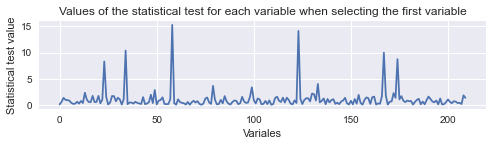

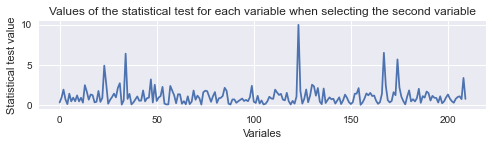

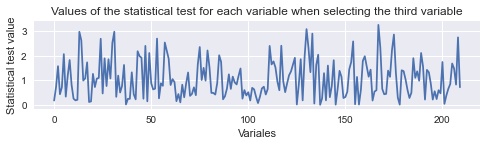

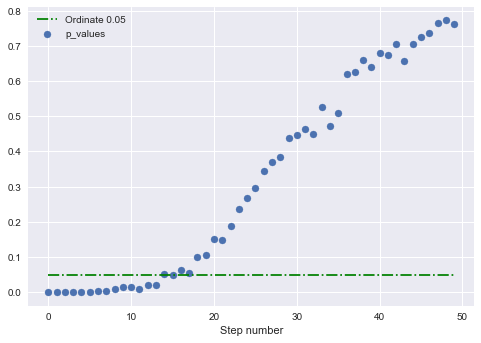

In [472]:
forward_variable_selection_for_plot(X_trainc, y_train)

The three first graphs confirm that the variables to be selected are 58, 123 and 167.\
Last graph corroborates the number of variables with p-value lower than 0.05 (there are 14).

### Question 13

Apply OLS on the 14 selected variables.

In [473]:
X_trainc_sel = X_trainc[:, selected_variables]
X_testc_sel = X_testc[:, selected_variables]

In [474]:
linear_reg.fit(X_trainc_sel, y_train)
y_pred_fvs = linear_reg.predict(X_testc_sel)

In [475]:
print('The computed MSE for OLS with forward variable selection is : mse =',
      mse(y_test, y_pred_fvs))
print('The determination coef for OLS with forward variable selection is:',
      determination_coef(y_test, np.array(y_pred_fvs)))

The computed MSE for OLS with forward variable selection is : mse = 0.5519044354563137
The determination coef for OLS with forward variable selection is: 0.4460676593872577


The determination coefficient obtained with this technique is better than with all the variables and with only the sixty first principal component. Still, the determination coefficient is lower and the MSE is larger than with Ridge and Lasso.

As there are only 14 variables used, we use those 14 coefficients for the corresponding variables and we put some 0 for the other variables in the dataset df_coef

In [355]:
temp_array = [0 for k in range(210)] # create an array with all 0
for i in range(len(selected_variables)): # complete the 14 non 0 values
    temp_array[selected_variables[i]] = linear_reg.coef_[i]

In [476]:
df_test['FVS'] = y_pred_fvs
df_coef['FVS'] = temp_array
df_score['FVS'] = (determination_coef(y_test, np.array(y_pred_fvs)),
                   mse(y_test, y_pred_fvs))

## Comparison
### Question 14

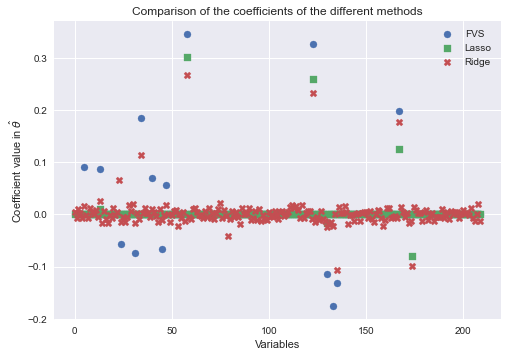

In [357]:
plt.scatter(np.arange(df_coef['FVS'].size), df_coef['FVS'], label='FVS')
plt.scatter(np.arange(df_coef['lasso'].size), df_coef['lasso'],
            marker ='s', label='Lasso')
plt.scatter(np.arange(df_coef['Ridge'].size), df_coef['Ridge'],
            marker ='X', label='Ridge')
plt.legend()
plt.xlabel('Variables')
plt.ylabel(r'Coefficient value in $\hat{\theta}$')
plt.title('Comparison of the coefficients of the different methods')
plt.show()

It is interesting to notice that all methods find that variables 57, 123, 167 are important for the prediction and give them a large coefficient. FVS has 14 non-zero coefficients which is linked to the p-value threshold we chose. Other methods have smaller number of significant coefficients (larger than 0.05 for example). Lasso is nice because it seems to only have 4 significant coefficients and as next plot shows, it gives the best determination score and the lowest mean-squarred error.

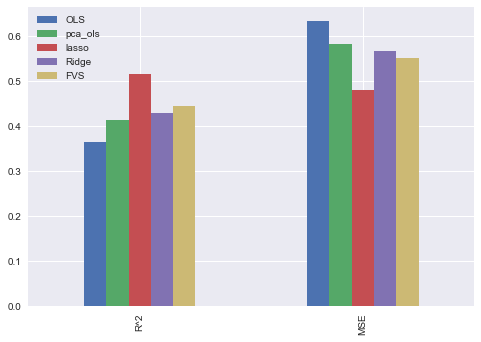

In [358]:
#plot the scores of all methods
df_score.index=['R^2', 'MSE']
df_score.plot.bar(y=df_score.columns)
plt.show()

### Question 15

In [359]:
print('Lasso has', np.count_nonzero(df_coef['lasso']==0),
      'coefficients exacty set to 0.')
print('Ridge has', np.count_nonzero(df_coef['Ridge']==0),
      'coefficients exacty set to 0.')
print('FVS has', np.count_nonzero(df_coef['FVS']==0),
      'coefficients exacty set to 0.')

Lasso has 203 coefficients exacty set to 0.
Ridge has 0 coefficients exacty set to 0.
FVS has 196 coefficients exacty set to 0.


The form of the polygone(a diamond) added by the regularization parameter of Lasso, linked to the use of norm 1 compared to the circle(in dimension 2, a sphere otherwise) induced by norm 2 allows to have more zero coefficients.\
Therefore, Lasso performs variable selection intrinsically.

### Question 16
Below is the pairplot for df_test:

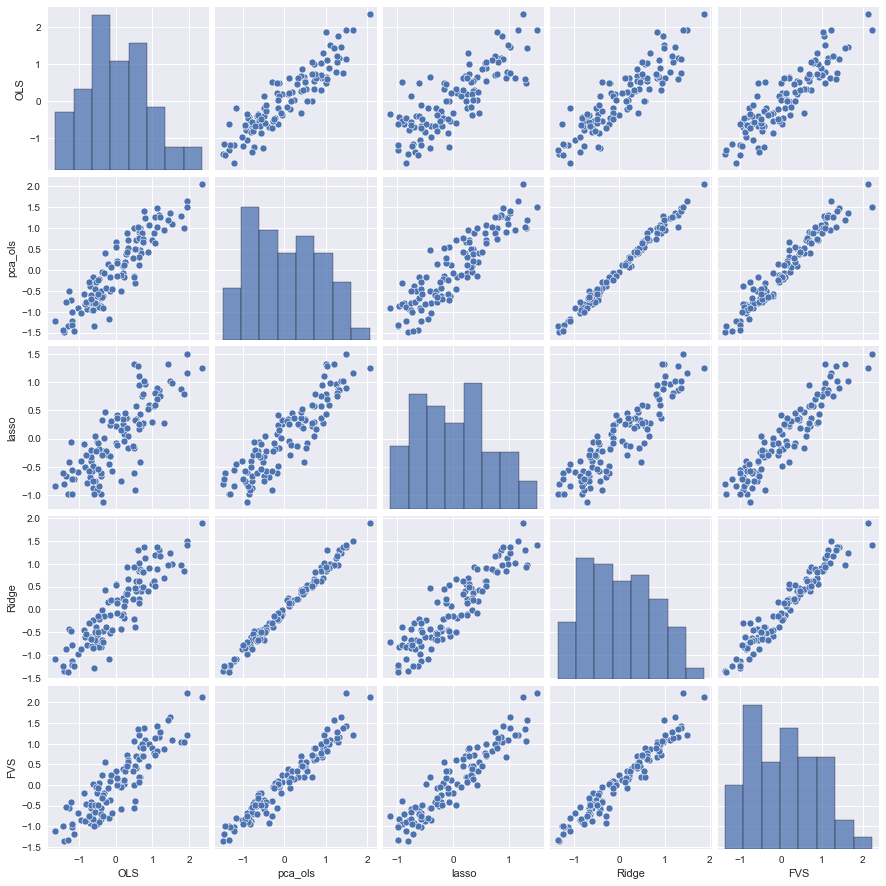

In [360]:
sns.pairplot(df_test)
plt.show()

In this pairplot : 
- for the subplots outside of the diagonal, the more the points are aligned along the identity line, the closer the coefficients for the two methods are. 
- for the subplots of the diagonal, it shows the distribution of the predicted values for the relevant method. We are looking for a distribution that gets close to a normal law.

We see that Ridge and PCA before OLS give similar coefficients. FVS is also close to Ridge and PCA before OLS. OLS, which is our baseline, is quite far from any other method, which is good because it shows that every methods perform have different coefficient from OLS, and we know that they perform better than OLS.

We use the notations from the wording.
If we want to predict the value at a new, unseen data point $x$, we use the following equations:
The $y$s are the predicted value for point $x$
- $y^{rd} = x^T \hat{\theta}^{rd}$
- $y^{ols} = x^T \hat{\theta}^{ols}$
- $y^{pca} = x^T U_k \hat{\theta}^{pca}$ where $U_k$ is the first k colums of U, matrix that comes from the SVD of $X$, initial data matrix for training. $x^T U_k$  is projection of $x$ on the first $k$ principal components
- $y^{ls} = x^T \hat{\theta}^{ls}$

## Confidence intervals and bootstapping
### Question 17

In [479]:
data, y = load_diabetes(return_X_y=True)
X = data[:,2].reshape(-1, 1)  #X is the 3rd column of the loaded data
n, p = np.shape(X)

In [480]:
linear_reg.fit(X,y)
print(f'The slope coefficient, theta_1,  is: {linear_reg.coef_[0]:.2f}')

The slope coefficient, theta_1,  is: 949.44


In [481]:
theta0, theta1 = linear_reg.intercept_,  linear_reg.coef_[0]

In [482]:
def confidence_intervals(alpha):
    """Fucntion that computes the right and left bounds of the 
    CI for theta0 and theta1
    parameter:
    alpha : level of the confidence interval
    returns :
    ci_theta0_left : left bound for theta0
    ci_theta0_right : right bound for theta0
    ci_theta1_left :  left bound for theta1
    ci_theta1_right : right bound for theta1
    """
    sigma_hat2 = 1/(n-p-1) * n * mean_squared_error(y, X * theta1 + theta0)
    Xmean = np.mean(X)
    Xvar = np.sum((X - Xmean)**2)

    theta1_var = sigma_hat2 / Xvar
    theta0_var = sigma_hat2 * (1/n + Xmean**2 / Xvar) 
    quantile = scipy.stats.t.ppf(1-alpha/2, n-p-1)

    ci_theta0_left =  theta0 - quantile * np.sqrt(theta0_var)
    ci_theta0_right = theta0 + quantile * np.sqrt(theta0_var)

    ci_theta1_left =  theta1 - quantile * np.sqrt(theta1_var)
    ci_theta1_right = theta1 + quantile * np.sqrt(theta1_var)
    
    return ci_theta0_left, ci_theta0_right, ci_theta1_left, ci_theta1_right


In [483]:
ci_theta0_left, ci_theta0_right, ci_theta1_left, ci_theta1_right \
= confidence_intervals(0.05)
print(f'Confidence interval for theta_0: [{ci_theta0_left:.2f},\
          {ci_theta0_right:.2f}]')
print(f'Confidence interval for theta_1: [{ci_theta1_left:.2f},\
          {ci_theta1_right:.2f}]')

Confidence interval for theta_0: [146.29,          157.98]
Confidence interval for theta_1: [826.57,          1072.30]


In [484]:
#Concatenate X and y
Xy = np.concatenate((X,y.reshape(442,1)), axis=1)
Xy_shape = np.shape(Xy)

In [485]:
k_array = np.linspace(10,10000, dtype=int)

In [486]:
# Generation of the bootstrap samples
coef_bootstrap = {}
for k in k_array:
    theta1_list = []
    for nb_samp in range(k):
        bootstrap_sample = np.zeros(Xy_shape)
        for i in range(Xy_shape[1]):
            index = np.random.randint(0, Xy_shape[0])
            bootstrap_sample[i] = Xy[index]
        linear_reg.fit(bootstrap_sample[:,0].reshape(-1, 1),
                       bootstrap_sample[:,1])
        
        theta1_list.append(linear_reg.coef_[0])
    coef_bootstrap[nb_samp] = theta1_list

In [487]:
y_plot = [np.median(coef_bootstrap[k-1]) for k in k_array]

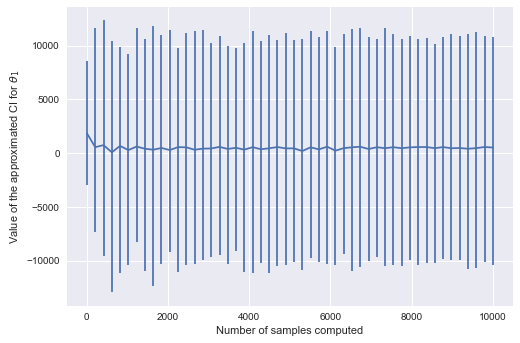

In [488]:
bar = np.zeros((2,len(k_array)))
alpha = 0.05
for i in range(len(k_array)):
    k = k_array[i] - 1
    # Negative part of the bars:
    bar[0][i] = y_plot[i] - np.quantile(coef_bootstrap[k], alpha/2)
    # Positive part of the bars:
    bar[1][i] = np.quantile(coef_bootstrap[k], 1-alpha/2) - y_plot[i]
plt.xlabel('Number of samples computed')
plt.ylabel(r'Value of the approximated CI for $\theta_1$')
plt.errorbar(k_array, y_plot, bar)
plt.show()

The plot doesn't clearly show that the method to approximate CI converges. What we can say is that extreme values are getting less common when we increase the number of bootstrap samples. \
Maybe we should do the computations with more bootstrap samples to see the approximate CI getting smaller.

In [489]:
def width_CI_theta1(alpha):
    sigma_hat2 = 1/(n-p-1) * n * mean_squared_error(y, X * theta1 + theta0)
    Xmean = np.mean(X)
    Xvar = np.sum((X - Xmean)**2)

    theta1_var = sigma_hat2 / Xvar 
    quantile = scipy.stats.t.ppf(1-alpha/2, n-p-1)
    return quantile * np.sqrt(theta1_var)

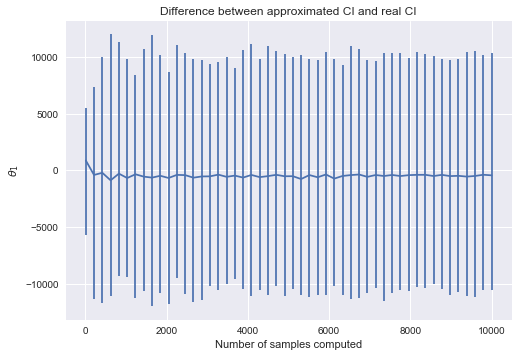

In [490]:
CI_width = width_CI_theta1(alpha)
plt.errorbar(k_array, y_plot-theta1, yerr=np.stack((CI_width-bar[0], CI_width-bar[1])))
plt.xlabel('Number of samples computed')
plt.ylabel(r'$\theta_1$')
plt.title("Difference between approximated CI and real CI")
plt.show()

The difference between the estimated CI and the real one appears to be very large. There may be a problem in my code, since these values are way too large. \
The values of approximated confidence intervals with boostrap are too far from each other to have a small enough and reasonable CI.

The CI decreases as $\alpha$ increases because the width of the CI is proportional to $t_{n-p-1}(1-\alpha/2)$. This quantity decreases as $\alpha$ increases.
We plot the confidence interval width as function of alpha below to illustrate this.

In [495]:
alphas = np.linspace(0.01, 0.1,10)
width = [width_CI_theta1(a) for a in alphas]

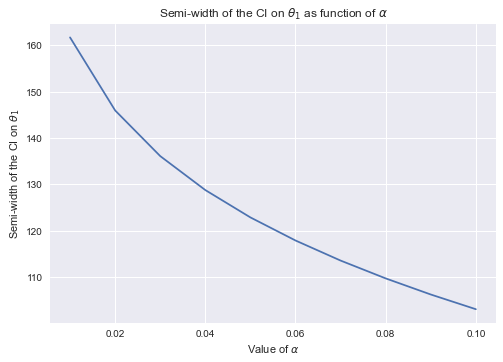

In [496]:
plt.plot(alphas, width)
plt.xlabel(r'Value of $\alpha$')
plt.ylabel(r'Semi-width of the CI on $\theta_1$')
plt.title(r'Semi-width of the CI on $\theta_1$ as function of $\alpha$')
plt.show()